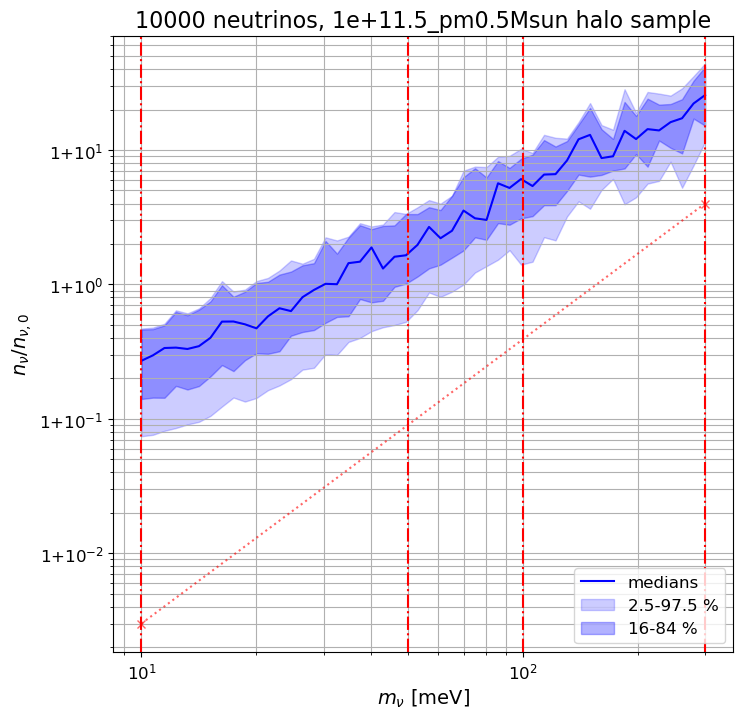

In [6]:
from shared.preface import *
import shared.functions as fct

# Load data.
nus = 10000
sim = 'L012N376'
mass_gauge = 11.5  # in log10 Msun
mass_range = 0.5
batchname = f'1e+{mass_gauge}_pm{mass_range}Msun'

fig, ax = plt.subplots(1,1, figsize=(8,8))
mass_ticks = 50
mass_range_eV = np.geomspace(0.01, 0.3, mass_ticks)*eV  # 10 to 300 meV

halo_num = 10
n_nus_l = []
for halo_j in range(halo_num):

    hname = f'{batchname}_halo{halo_j}'
    fname = f'{nus}nus_{hname}'
    u_all = fct.load_sim_data(sim, fname, 'velocities')


    # Calculate number density (averaged values for z in [z_average, 4]).
    output = f'{sim}/number_densities_{nus}nus_{hname}.npy'
    fct.number_density_1_mass(
        u_all, mass_range_eV, output, 
        average=True, m_average=0.01, z_average=1.5
    )
    n_nus_l.append(np.load(f'{output}')/N0)


n_nus_arr = np.array(n_nus_l).reshape(halo_num, mass_ticks)
nus_median = np.median(n_nus_arr, axis=0)
nus_perc2p5 = np.percentile(n_nus_arr, q=2.5, axis=0)
nus_perc97p5 = np.percentile(n_nus_arr, q=97.5, axis=0)
nus_perc16 = np.percentile(n_nus_arr, q=16, axis=0)
nus_perc84 = np.percentile(n_nus_arr, q=84, axis=0)

# Plotting the number density median and percentiles, to create a "band".

ax.plot(mass_range_eV*1e3, (nus_median-1), color='blue', label='medians')
ax.fill_between(
    mass_range_eV*1e3, (nus_perc2p5-1), (nus_perc97p5-1), 
    color='blue', alpha=0.2, label='2.5-97.5 %')
ax.fill_between(
    mass_range_eV*1e3, (nus_perc16-1), (nus_perc84-1), 
    color='blue', alpha=0.3, label='16-84 %')


x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.plot(x_ends, y_ends, marker='x', ls=':', c='r', alpha=0.6)

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'{nus} neutrinos, {batchname} halo sample')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
# ax.set_ylim(1e-3, 1e1)
plt.grid(True, which="both", ls="-")
plt.legend(loc='lower right')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/number_density_band_{nus}nus_{batchname}_batch.pdf')
plt.show()

# print('Max value:', np.max(n_nus), np.max(n_nus-1))